<a href="https://colab.research.google.com/github/rajan-srivastava7/credit-card-default/blob/main/Credit_Card_Default_Prediction_Rajan_Srivasatava_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#Import Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Mount Drive

In [ ]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

In [ ]:
# Importing the Credit Card Default Dataset
credit_df = pd.read_csv('/content/drive/My Drive/ALMABETTER/Capston_Project3/default of credit card clients.csv')

#After loading the dataset, just have a look at the first five rows of the dataset. Now we try to execute some basic computations to understand the data.

In [ ]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
print(credit_df.columns)
print(credit_df.shape)
#df.shape

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
(30000, 25)


In [ ]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#Ok! that’s even great we don’t have any missing values to handle.

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#Data Analysis
**Let’s have a look at the target variable “default payment next month” and distribution of that feature data.**

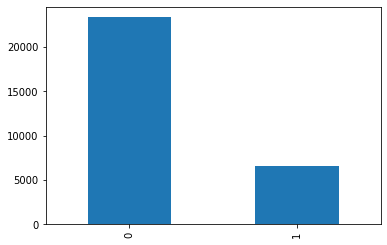

In [ ]:
credit_df['default payment next month'].value_counts().plot.bar()
plt.show()

#From the above result, we can conclude that many of the clients are not interested in a payment next month.

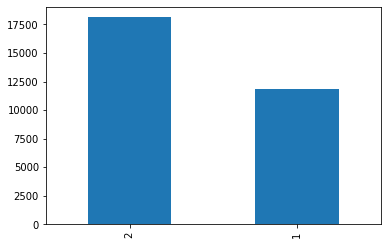

In [ ]:
credit_df['SEX'].value_counts().plot.bar()
plt.show()

#It finds that The number of Male credit holder is less than Female.

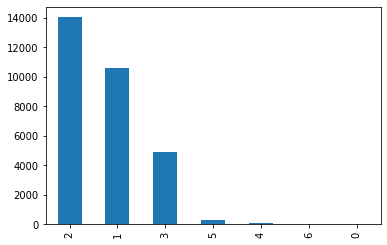

In [ ]:
credit_df['EDUCATION'].value_counts().plot.bar()
plt.show()

#It looks like most of the client’s education level belongs to category 2,1 and 3.

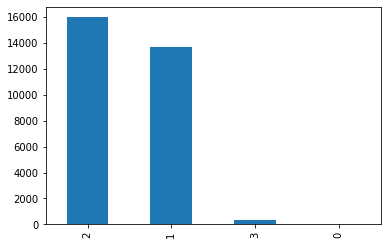

In [ ]:
credit_df['MARRIAGE'].value_counts().plot.bar()
plt.show()

#We noticed that there is very less number of values for category 3 and 0.

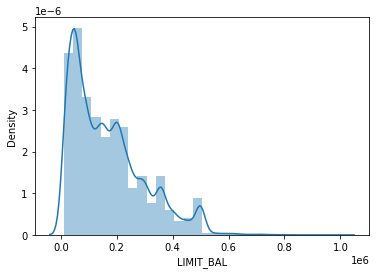

In [ ]:
sns.distplot(credit_df['LIMIT_BAL'],kde=True,bins=30)
plt.show()

#Most of the values are between 0.0 to 0.2

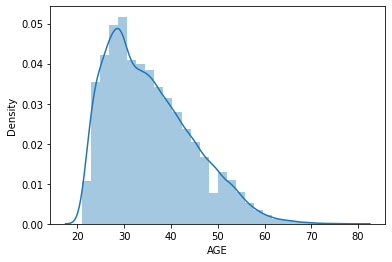

In [ ]:
sns.distplot(credit_df['AGE'],kde=True,bins=30)
plt.show()

#There is a large number of clients whose age is between 25 to 40.

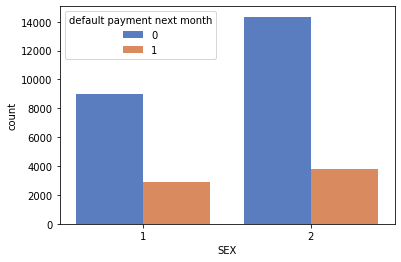

In [ ]:
sns.countplot(x='SEX', data=credit_df,hue="default payment next month", palette="muted")
plt.show()

#For females, the count of default payment next month = 0 is highter than males.

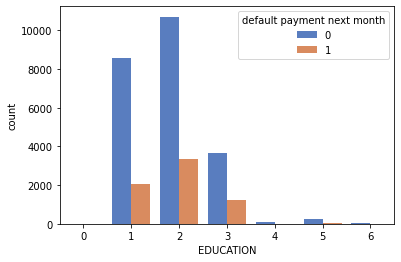

In [ ]:
sns.countplot(x='EDUCATION',data=credit_df,hue="default payment next month",palette="muted")
plt.show()

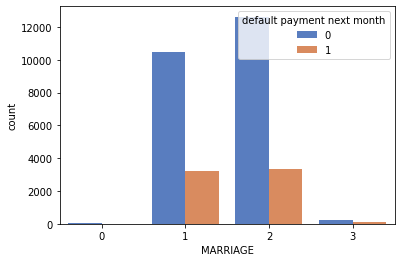

In [ ]:
sns.countplot(x='MARRIAGE',data=credit_df,hue="default payment next month", palette="muted")
plt.show()

#Almost there is an equal number of clients who default the payment next month for both the Married and Single category.

#Now let’s do some data pre-processing steps and find some interesting patterns in the dataset.

#Data Processing
**Let’s extract some insights for some data features if they want to tell us something. We will find it out.**

In [ ]:
credit_df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

#There is some double-digit count of values of the PAY_0 data feature and for some data features also. So we will create one single category of all low categories having less count.

In [ ]:
fill = (credit_df.PAY_0 == 4) | (credit_df.PAY_0==5) | (credit_df.PAY_0==6) | (credit_df.PAY_0==7) | (credit_df.PAY_0==8)
credit_df.loc[fill,'PAY_0']=4
credit_df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4      141
Name: PAY_0, dtype: int64

#Let’s do it for the rest of the data features.

In [ ]:
fill = (credit_df.PAY_2 == 4) | (credit_df.PAY_2 == 1) | (credit_df.PAY_2 == 5) | (credit_df.PAY_2 == 7) | (credit_df.PAY_2 == 6) | (credit_df.PAY_2 == 8)
credit_df.loc[fill,'PAY_2']=4
#df.PAY_2.value_counts()
fill = (credit_df.PAY_3 == 4) | (credit_df.PAY_3 == 1) | (credit_df.PAY_3 == 5) | (credit_df.PAY_3 == 7) | (credit_df.PAY_3 == 6) | (credit_df.PAY_3 == 8)
credit_df.loc[fill,'PAY_3']=4
#df.PAY_3.value_counts()
fill = (credit_df.PAY_4 == 4) | (credit_df.PAY_4 == 1) | (credit_df.PAY_4 == 5) | (credit_df.PAY_4 == 7) | (credit_df.PAY_4 == 6) | (credit_df.PAY_4 == 8)
credit_df.loc[fill,'PAY_4']=4
#df.PAY_4.value_counts()
fill = (credit_df.PAY_5 == 4) | (credit_df.PAY_5 == 7) | (credit_df.PAY_5 == 5) | (credit_df.PAY_5 == 6) | (credit_df.PAY_5 == 8)
credit_df.loc[fill,'PAY_5']=4
#df.PAY_5.value_counts()
fill = (credit_df.PAY_6 == 4) | (credit_df.PAY_6 == 7) | (credit_df.PAY_6 == 5) | (credit_df.PAY_6 == 6) | (credit_df.PAY_6 == 8)
credit_df.loc[fill,'PAY_6']=4
#df.PAY_6.value_counts()

#Now when you look at data there are some data features that have values on a large scale like bill_amt variables and many more. So we need to scale that variables.

In [ ]:
credit_df.columns = credit_df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
#you can inbuilt StandardScalar() or MinMaxScalar() also
credit_df[col_to_norm] = credit_df[col_to_norm].apply(lambda x :( x-np.mean(x))/np.std(x))
#df.head()

#Feature scaling is done.

#Correlation
**Now we check the correlation of the independent variables with our target(dependent) variable.**

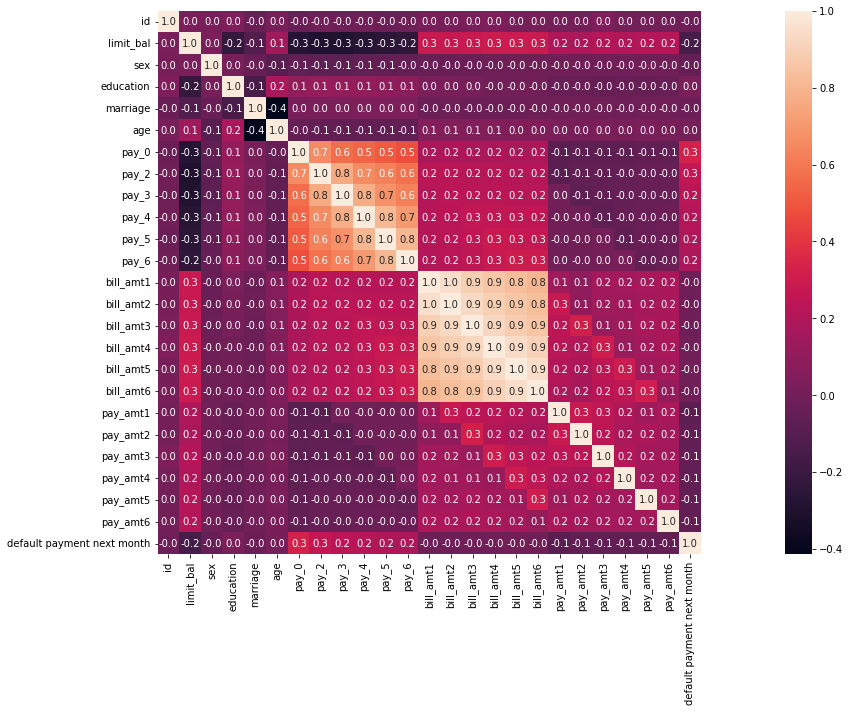

In [ ]:
correlation = credit_df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )
plt.show()

#Looking at the heatmap, you figured out that target variable default payment next month depends on pay variables more. But I don’t suggest you drop the other features because it will be the loss of information. You can have a try of training the model with the most dependent features and evaluate the model also.

#Predictive Modeling
**Now move towards predictive modeling. First, we split the training data into train and test using train_test_split().**

In [ ]:
credit_df = credit_df.drop(["id"],1)
X = credit_df.iloc[:,:-1].values
y = credit_df.iloc[:,-1].values
#We split the data into train(0.75) and test(0.25) size.
 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

#Let’s apply different machine learning models and evaluate the accuracy of the model.

In [ ]:
#Start with logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.8088,0.711957,0.235612,0.354054,0.604174


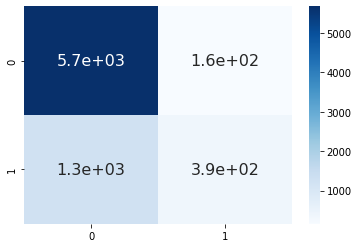

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.show()

#We got the accuracy of 0.8088. 

#Let’s apply some different models also,
#Random Forest Classifier Model

In [ ]:
#Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.8144,0.647752,0.36271,0.465027,0.653148


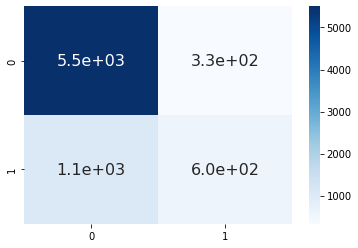

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.show()

**Good improvement, let’s try with another model.**

#XGBoost Classifier

In [ ]:
#Apply XGBoost classifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred =xgb.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.8192,0.680139,0.353118,0.464878,0.65281


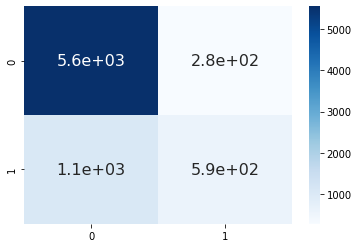

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.show()

#Now we can evaluate that our XGBoost classifier model got a higher accuracy of 0.8192.

#Conclusions
**We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.**<br>
**Using the three classifier models, the accuracy we obtained is as follows:**

**(1)Logistic Regression: 0.8088**<br>
**(2)Random Forest Classifier: 0.8144**<br>
**(3)XGBoost Classifier: 0.8192**

#References
**AlmaBetter**<br>
**Kaggle**<br>
**Github**<br>
**Researchget.net**<br>
**Other Sources**